In [ ]:
!nvidia-smi

Mon Jul 18 05:05:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    28W /  70W |   8958MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading deep learning algorithm
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import keras
#import keras.backend as K
#from keras.models import Sequential
#from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

IMAGE_SIZE = [224,224]
CLASS=2
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#model = VGG16(weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False
#folders = glob('C:\rafid\guava disease research\k_guava\train_image/*')
x = Flatten()(inception.output)
prediction = Dense(CLASS, activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)
adam = keras.optimizers.Adam(lr = 0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer = adam,
  metrics=['accuracy']
)
print("\n\n")
model.summary()




Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 ormalization)                                                                                    
                                                                                                  
 activation_97 (Activation)     (None, 54, 54, 80)   0           ['batch_normalization_97[0][0]'] 
                                                                                                  
 conv2d_98 (Conv2D)             (None, 52, 52, 192)  138240      ['activation_97[0][0]']          
                                                                                                  
 batch_normalization_98 (BatchN  (None, 52, 52, 192)  576        ['conv2d_98[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_98 (Activation)     (None, 52, 52, 192)  0           ['batch_normalization_98[0][0]'] 
          

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Taka/split /train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Taka/split /val',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Taka/split /test',
                                            target_size = (224,224),
                                            batch_size = 1,
                                            class_mode = 'categorical')
print("\n\n")
model.optimizer.get_config()

Found 516 images belonging to 2 classes.
Found 147 images belonging to 2 classes.
Found 75 images belonging to 2 classes.





{'amsgrad': False,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.0,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Adam'}

In [ ]:
filepath = "/content/drive/MyDrive/Dataset Taka/inception v3/highest_val2.h5"
filepath2 = "/content/drive/MyDrive/Dataset Taka/inception v3/highest_train2.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')
checkpoint2 = ModelCheckpoint(filepath2, monitor='accuracy', verbose=1,
                             save_best_only=True, mode='max')
callbacks_list = [checkpoint1,checkpoint2]
r = model.fit_generator(
    training_set,
    epochs=16,
    validation_data=val_set,
    steps_per_epoch=len(training_set),
    validation_steps=len(val_set),
    callbacks=callbacks_list
)
model.save_weights("/content/drive/MyDrive/Dataset Taka/inception v3/end2.h5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/16
17/17 [==============================] - ETA: 0s - loss: 3.6332 - accuracy: 0.7829
Epoch 1: val_accuracy improved from -inf to 0.87075, saving model to /content/drive/MyDrive/Dataset Taka/inception v3/highest_val2.h5

Epoch 1: accuracy improved from -inf to 0.78295, saving model to /content/drive/MyDrive/Dataset Taka/inception v3/highest_train2.h5
17/17 [==============================] - 178s 10s/step - loss: 3.6332 - accuracy: 0.7829 - val_loss: 0.3860 - val_accuracy: 0.8707
Epoch 2/16
17/17 [==============================] - ETA: 0s - loss: 0.6238 - accuracy: 0.8915
Epoch 2: val_accuracy improved from 0.87075 to 0.93197, saving model to /content/drive/MyDrive/Dataset Taka/inception v3/highest_val2.h5

Epoch 2: accuracy improved from 0.78295 to 0.89147, saving model to /content/drive/MyDrive/Dataset Taka/inception v3/highest_train2.h5
17/17 [==============================] - 171s 10s/step - loss: 0.6238 - accuracy: 0.8915 - val_loss: 0.3181 - val_accuracy: 0.9320
Epoch 3/16

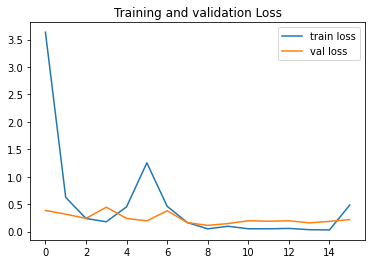

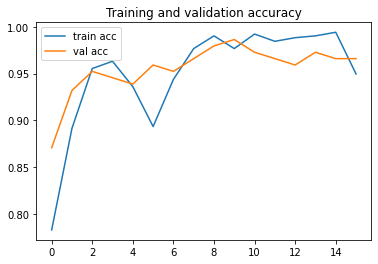

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot of accuracy and loss

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
#evaluating the model (test acc)
#batch size = 32
model.load_weights('/content/drive/MyDrive/Dataset Taka/inception v3/highest_val2.h5')
preds = model.evaluate_generator(test_set)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


Loss = 0.19605930149555206
Test Accuracy = 0.9733333587646484


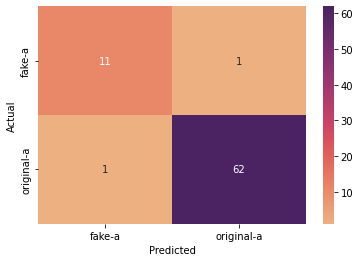

In [ ]:
#confusion matrix

#you have to set test bath size=1 before running the cell
import pandas as pd
import seaborn as sn
import tensorflow as tf
model.load_weights('/content/drive/MyDrive/Dataset Taka/inception v3/highest_val2.h5')
filenames=test_set.filenames
nb_samples=len(test_set)
y_prob=[]
y_act=[]
test_set.reset()
for _ in range (nb_samples):
    X_test,Y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
predicted_class=[list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class=[list(training_set.class_indices.keys())[i.argmax()]for i in y_act]
out_df=pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix=pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])
import matplotlib.pyplot as plt
sn.heatmap(confusion_matrix,cmap='flare', annot=True, fmt='d')
plt.show()
#plt.savefig('/content/drive/MyDrive/model weights/vgg16_AugGfb_split1_maxval_3')

In [ ]:
lst=[r.history['loss'],r.history['val_loss'],r.history['accuracy'],r.history['val_accuracy']]

In [ ]:
print(lst)

[[3.633228302001953, 0.6237930059432983, 0.23924744129180908, 0.1790946125984192, 0.4514355957508087, 1.2535165548324585, 0.46076032519340515, 0.16407519578933716, 0.05066362023353577, 0.09741280972957611, 0.0519508421421051, 0.05083084851503372, 0.05826009437441826, 0.03495917469263077, 0.03092338517308235, 0.4848197400569916], [0.38602548837661743, 0.3180784583091736, 0.2414056658744812, 0.4448634088039398, 0.2399618923664093, 0.19578289985656738, 0.37953922152519226, 0.16371722519397736, 0.11376514285802841, 0.14644233882427216, 0.19824965298175812, 0.18826192617416382, 0.19759680330753326, 0.1600494086742401, 0.18612925708293915, 0.2187758982181549], [0.7829457521438599, 0.8914728760719299, 0.9554263353347778, 0.963178277015686, 0.9360465407371521, 0.893410861492157, 0.9437984228134155, 0.9767441749572754, 0.9903100728988647, 0.9767441749572754, 0.9922480583190918, 0.9844961166381836, 0.9883720874786377, 0.9903100728988647, 0.9941860437393188, 0.9496123790740967], [0.87074828147888